In [1]:
import warnings

import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import scipy.stats as sps

import sklearn.metrics
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold
from sklearn.metrics import (
    confusion_matrix, mean_squared_error, roc_auc_score
)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier, DMatrix

from catboost import CatBoostRegressor, Pool, CatBoostClassifier
from catboost.datasets import titanic

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data_features.csv')
df.head()

,Unnamed: 0,W_nickname,B_nickname,Result,mean_deltawinrate,mean_deltaScore50p,mean_deltascoreLead,dispersy_scoreLead,beautiful_percent,beautifulS_percent,...,dispersy_scoreLead 20,mean_utility 20,mean_dist,dispersy_dist,percent_p10,percent_p5,percent_p20,mean_dist_from_enemy,dispersy_dist_from_enemy,median_dist
0,0,败亦喜418,海上游地,-1,-0.015628,-0.949885,-1.190903,2.123069,0.106383,0.063830,...,3.382784,-0.018578,5.891304,28.792533,11,22,1,4.553191,18.970575,4.0
1,1,王全洪18,zxh8209,1,-0.012258,-0.279557,-0.294572,0.089070,0.444444,0.111111,...,0.089070,-0.024801,6.000000,28.500000,3,3,0,4.888889,18.098765,3.0
2,2,å…‰å¤´å¼º820,æ–¹å»ºå?Žå“¥,-1,-0.008678,-1.260620,-2.048423,9.557839,0.626984,0.198413,...,2.329477,-0.002031,4.352000,14.660096,14,39,1,3.595238,14.844104,3.0
3,3,YY817155,ç?µå…‰å°?æ¢…,1,-0.029067,-0.132272,0.004268,7.231991,0.378378,0.351351,...,12.591115,-0.071420,4.388889,24.959877,4,10,1,4.756757,16.454346,2.0
4,4,傲骨铮铮,晓春541020,1,-0.007747,-0.861811,-1.300010,6.864337,0.495652,0.260870,...,17.775343,0.003455,5.026316,26.271237,18,42,4,4.878261,24.124310,3.0


In [195]:
features =['Result',
           'Result',
'mean_deltawinrate',
'mean_deltaScore50p',
'mean_deltascoreLead',
'dispersy_scoreLead',
'beautiful_percent',
'beautifulS_percent',
'mean_utility',
'Score25p',
'Score75p',
'Winrate25p',
'Winrate75p',
'mean_deltawinrate50p',
'median_scorelead',
'length',
'mean_deltaSelfPlay',
'BestScoreMove',
'WorstScoreMove',
'Mean5WorstScoreMove',
'Mean5BestScoreMove',
'mean_deltawinrate yose',
'beautiful_percent yose',
'beautifulS_percent yose',
'mean_deltascoreLead yose',
'mean_deltaSelfPlay yose',
'dispersy_scoreLead yose',
'mean_utility yose',
'len_yose',
'start_yose',
'has_yose',
'mean_deltawinrate 10',
'beautiful_percent 10',
'beautifulS_percent 10',
'mean_deltascoreLead 10',
'mean_deltaSelfPlay 10',
'dispersy_scoreLead 10',
'mean_utility 10',
'mean_deltawinrate 20',
'beautiful_percent 20',
'beautifulS_percent 20',
'mean_deltascoreLead 20',
'mean_deltaSelfPlay 20',
'dispersy_scoreLead 20',
'mean_utility 20',
'mean_dist',
'dispersy_dist',
'percent_p10',
'percent_p5',
'percent_p20',
'mean_dist_from_enemy',
'dispersy_dist_from_enemy',
'median_dist',
]

X = df[features]
y = df['chiselka']
# y = []
# for r in Y:
#     if (r[1] == 'k'):
#         y.append(-(int(r[0]) - int('1')))
#     else:
#         y.append(int(r[0]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
X_train[features]

,Result,Result,Result,Result,mean_deltawinrate,mean_deltaScore50p,mean_deltascoreLead,dispersy_scoreLead,beautiful_percent,beautifulS_percent,...,dispersy_scoreLead 20,mean_utility 20,mean_dist,dispersy_dist,percent_p10,percent_p5,percent_p20,mean_dist_from_enemy,dispersy_dist_from_enemy,median_dist
75220,1,1,1,1,-0.094098,-1.828909,-2.799231,36.553890,0.211268,0.169014,...,104.715055,-0.247220,4.514286,17.992653,11,21,0,5.507042,41.489387,3.0
48955,1,1,1,1,-0.075566,-0.654314,-0.780909,1.054564,0.285714,0.187500,...,0.249307,-0.102076,6.837838,41.739469,28,52,7,4.428571,24.494898,4.0
44966,-1,-1,-1,-1,-0.052176,-1.354131,-1.781107,3.744156,0.210526,0.140351,...,5.725296,-0.053211,4.946429,25.586416,11,20,2,5.175439,30.109572,3.0
13568,1,1,1,1,-0.050495,-0.971415,-1.153601,2.484242,0.239669,0.198347,...,1.476892,-0.138036,5.583333,27.943056,21,48,4,4.479339,28.084284,4.0
92727,-1,-1,-1,-1,-0.056858,-0.643072,-1.747535,13.663645,0.244444,0.200000,...,23.766125,-0.205890,4.454545,8.611570,3,17,0,3.177778,9.079506,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,-1,-1,-1,-1,-0.032074,-1.457544,-2.264547,9.855436,0.326087,0.141304,...,27.300213,-0.002285,4.197802,16.356479,10,25,0,3.836957,20.397330,3.0
54886,1,1,1,1,-0.036400,-0.550179,-0.716214,10.948317,0.341176,0.341176,...,22.394413,-0.075204,4.500000,15.535714,10,29,1,4.576471,26.573564,3.0
76820,1,1,1,1,-0.093863,-1.461750,-1.802444,9.391753,0.325203,0.178862,...,21.808833,-0.258267,4.598361,22.174751,19,37,2,3.601626,15.670566,3.0
860,-1,-1,-1,-1,-0.080303,-1.143770,-1.763479,6.187474,0.269565,0.191304,...,2.173437,-0.168972,5.175439,26.969221,18,44,3,4.052174,20.571191,3.0


# 1. XGBoost

In [11]:
y_train

40507    5
72707    5
90912    2
28532    7
13006    3
        ..
6265     2
54886    0
76820   -2
860     -2
15795    6
Name: chiselka, Length: 60000, dtype: int64

In [13]:
y_test

75721    1
80184    6
19864    4
76699    0
92991    3
        ..
84191    7
4373     4
57452   -1
31042   -2
40093    3
Name: chiselka, Length: 40000, dtype: int64

In [27]:
xgb_model = XGBRegressor(
    silent=True, max_depth=4, n_estimators=200, random_state=42, verbosity=0,
    learning_rate=0.1, min_child_weight=1, booster='gbtree'
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test, y_test)
print(mean_absolute_error(y_pred, y_test)) 

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [30]:
print(mean_absolute_error(y_pred, y_test)) 

1.699504335747671


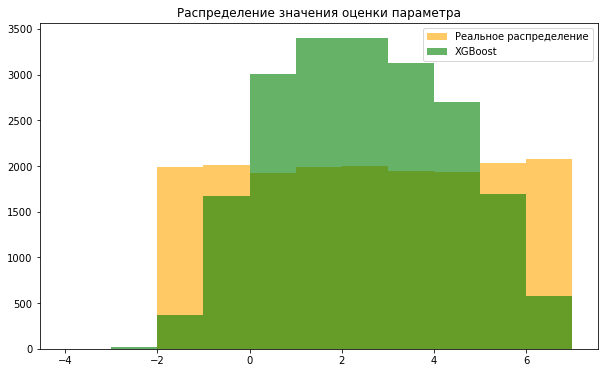

In [29]:
from matplotlib import pyplot as plt
bins = [i + -4.001 for i in range(12)]
plt.figure(figsize=(10, 6))
plt.title("Распределение значения оценки параметра")
plt.hist(
    y_test,
    bins = bins,
    alpha = 0.6,
    color = 'orange',
    label = 'Реальное распределение'
)
plt.hist(
    y_pred,
    bins = bins,
    alpha = 0.6,
    color = 'green',
    label = 'XGBoost'
)
plt.legend()
plt.show()

In [140]:
xgb_model

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=175, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=0)

In [321]:
%%time

parameters_grid = {
    'n_estimators' : [100, 1000, 1500, 2000],
    'max_depth' : range(1, 15, 2),
    'subsample' : [0.8, 0.9, 1.0],
    'colsample_bytree' : [0.7, 0.8, 0.9, 1.0],
    'colsample_bylevel' : [0.7, 0.8, 0.9, 1.0] ,
    'lambda' : sps.expon(loc=0, scale=1),
    'alpha' : sps.expon(loc=0, scale=1),
    'eta' : [0.001, 0.1, 1, 10]
}

# задаем стратегию кросс-валидации
ss = StratifiedKFold(n_splits=5)

# определяем поиск по сетке 
gs = RandomizedSearchCV(
    # модель для обучения, в нашем случае XGBoostClassifier
    estimator=xgb_model,
    # количество итераций поиска 
    n_iter=200,
    # сетка значений гиперпараметров
    param_distributions=parameters_grid,
    # метрика качества, берем accuracy
    scoring='r2',
    # GridSearch отлично параллелится, но и XGBoost параллелится
    n_jobs=1,  
    # стратегия кросс-валидации
    cv=ss,  
     # сообщения с логами обучения: больше значение - больше сообщений
    verbose=1, 
    # значение, присваиваемое scorer в случае ошибки при обучении
    error_score='raise',
    # seed для генератора случайных чисел
    random_state=42
)

# выполняем поиск по сетке
gs.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
CPU times: user 13h 22min 48s, sys: 42.8 s, total: 13h 23min 31s
Wall time: 1h 47min 43s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth...
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f55756890d0>,
                                        'colsample_bylevel': [0.7, 0.8, 0.9,
                                                          

In [15]:
gs.best_params_

NameError: name 'gs' is not defined

In [323]:
best_estimator = gs.best_estimator_
best_estimator.fit(X_train, y_train)
y_pred = best_estimator.predict(X_test)
mean_absolute_error(y_test, y_pred)

1.849368533247849

In [158]:
native_xgb_model = xgb_model.get_booster()
for name, value in Counter(native_xgb_model.get_fscore()).most_common():
    print('"' + name + '",')

"mean_dist",
"dispersy_dist",
"mean_deltawinrate50p",
"mean_utility",
"mean_deltawinrate",
"Winrate25p",
"Score75p",
"dispersy_scoreLead",
"Winrate75p",
"mean_deltascoreLead",
"Score25p",
"beautiful_percent",
"beautiful_percent 20",
"beautifulS_percent 20",
"beautiful_percent 10",
"mean_deltaScore50p",
"median_scorelead",
"mean_deltascoreLead yose",
"beautiful_percent yose",
"mean_deltaSelfPlay",
"dispersy_scoreLead 10",
"mean_deltascoreLead 20",
"dispersy_scoreLead yose",
"beautifulS_percent 10",
"mean_deltaSelfPlay 20",
"mean_deltascoreLead 10",
"dispersy_scoreLead 20",
"beautifulS_percent",
"mean_utility 10",
"mean_deltawinrate yose",
"mean_deltawinrate 20",
"mean_deltaSelfPlay 10",
"beautifulS_percent yose",
"mean_deltaSelfPlay yose",
"mean_utility yose",
"mean_deltawinrate 10",
"mean_utility 20",


In [82]:
xgb_params = {
    "booster": "gbtree",
    "learning_rate": 0.1,
    "max_depth": 5,
    "min_child_weight": 1,
    "gamma": 0.1,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
    "eval_metric": "mae"
}

In [83]:
xgtrain = xgb.DMatrix(X_train, y_train)
xgtest = xgb.DMatrix(X_test, y_test)
evallist = [(xgtest, 'eval'), (xgtrain, 'train')]

In [84]:
cvresult = xgb.cv(
    xgb_params, xgtrain, num_boost_round=3000, 
    nfold=5, early_stopping_rounds=300
)

In [86]:
cvresult[-3:]

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
196,0.968812,0.016586,1.897338,0.026538
197,0.966233,0.016813,1.897141,0.026091
198,0.963526,0.016025,1.896760,0.026517


In [87]:
param_grid = {
    "max_depth": range(3, 10),
    "min_child_weight": range(1, 10),
}

xgb_params = {
    "booster": "gbtree",
    "n_estimators": 198,
    "learning_rate": 0.1,
    "gamma": 0.1,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
    "eval_metric": "mae"
}

In [90]:
gs = GridSearchCV(xgb.XGBRegressor(**xgb_params), param_grid, 
                  n_jobs=1, scoring='r2', verbose=1, cv=5)

In [91]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    enable_categorical=False, eval_metric='mae',
                                    gamma=0.1, gpu_id=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=198, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_we

In [92]:
gs.best_params_

{'max_depth': 3, 'min_child_weight': 2}

In [101]:
param_grid = {
    "gamma": [i / 10 for i in range(5)]
}

xgb_params = {
    "booster": "gbtree",
    "n_estimators": 198,
    "learning_rate": 0.1,
    "max_depth": 3,
    "min_child_weight": 2,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
    "eval_metric": "mae"
}

In [102]:
gs = GridSearchCV(xgb.XGBRegressor(**xgb_params), param_grid, 
                  n_jobs=1, scoring='r2', verbose=1, cv=5)

In [103]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    enable_categorical=False, eval_metric='mae',
                                    gamma=None, gpu_id=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=3, min_child_weight=2,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=198, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=

In [104]:
gs.best_params_

{'gamma': 0.0}

In [105]:
param_grid = {
    "subsample": [i / 10 for i in range(4, 11)],
    "colsample_bytree": [i / 10 for i in range(4, 11)]
}

xgb_params = {
    "booster": "gbtree",
    "n_estimators": 198,
    "learning_rate": 0.1,
    "max_depth": 3,
    "gamma": 0,
    "min_child_weight": 2,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
    "eval_metric": "mae"
}

In [106]:
gs = GridSearchCV(xgb.XGBRegressor(**xgb_params), param_grid, 
                  n_jobs=1, scoring='accuracy', verbose=1, cv=5)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    enable_categorical=False, eval_metric='mae',
                                    gamma=0, gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=3, min_child_weight=2,
                                    missing=nan, monotone_constra...
                                    n_estimators=198, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subs

In [107]:
gs.best_params_

{'colsample_bytree': 0.4, 'subsample': 0.4}

In [111]:
param_grid = {
    'alpha': [0, 0.001, 0.005, 0.01, 0.05],
    'lambda': [0, 0.001, 0.005, 0.01, 0.05],
}

xgb_params = {
    "booster": "gbtree",
    "n_estimators": 198,
    "learning_rate": 0.1,
    "max_depth": 3,
    "gamma": 0,
    "subsample": 0.4,
    'colsample_bytree': 0.4,
    "min_child_weight": 2,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
    "eval_metric": "mae"
}

gs = GridSearchCV(xgb.XGBRegressor(**xgb_params), param_grid, 
                  n_jobs=1, scoring='accuracy', verbose=1, cv=5)

In [112]:
gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'alpha': 0, 'lambda': 0}

In [113]:
xgb_params = {
    "booster": "gbtree",
    "n_estimators": 198,
    "learning_rate": 0.1,
    "max_depth": 3,
    "gamma": 0,
    "subsample": 0.4,
    'colsample_bytree': 0.4,
    "min_child_weight": 2,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
    "eval_metric": "mae",
    "alpha": 0,
    "lambds": 0
}

In [114]:
best_estimator = gs.best_estimator_
best_estimator.fit(X_train, y_train)
y_pred = best_estimator.predict(X_test)
mean_absolute_error(y_test, y_pred)

1.8533845494700363

# 2. CatBoost

In [78]:
reg = LinearRegression().fit(X_train, y_train)
lin_pred_train = reg.predict(X_train)
lin_pred_test = reg.predict(X_test)

In [79]:
X_train_lin = X_train.assign(lin=lin_pred_train)
X_test_lin = X_test.assign(lin=lin_pred_test)

In [84]:
cb_model = CatBoostRegressor(silent=True, eval_metric="RMSE", random_state=42)
# cross_val_score(cb_model, X, y, 
#                 scoring='neg_mean_absolute_error', cv=3)
cb_model.fit(X_train_lin, y_train)

In [85]:
y_pred = cb_model.predict(X_test_lin)

In [87]:
mean_absolute_error(np.round(y_pred), y_test)

1.641

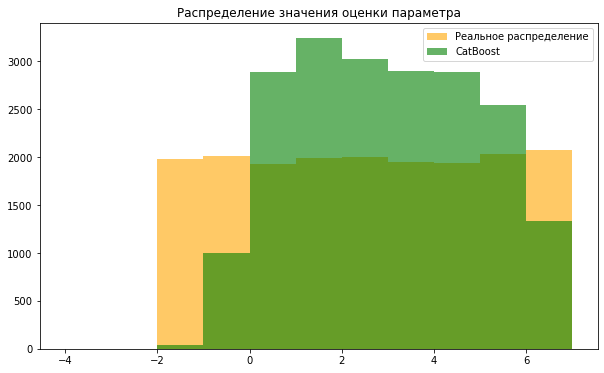

In [88]:
from matplotlib import pyplot as plt
bins = [i + -4.001 for i in range(12)]
plt.figure(figsize=(10, 6))
plt.title("Распределение значения оценки параметра")
plt.hist(
    y_test,
    bins = bins,
    alpha = 0.6,
    color = 'orange',
    label = 'Реальное распределение'
)
plt.hist(
    np.round(y_pred),
    bins = bins,
    alpha = 0.6,
    color = 'green',
    label = 'CatBoost'
)
plt.legend()
plt.show()

In [76]:
cb = CatBoostRegressor(
    silent=True, eval_metric="MAE", custom_metric=["MAPE"], random_state=42
)
cb.fit(X_train_lin, y_train, 
       eval_set=[(X_test_lin, y_test)], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [74]:
X_test_lin

,Result,mean_deltawinrate,mean_deltaScore50p,mean_deltascoreLead,dispersy_scoreLead,beautiful_percent,beautifulS_percent,mean_utility,Score25p,Score75p,...,mean_utility 20,mean_dist,dispersy_dist,percent_p10,percent_p5,percent_p20,mean_dist_from_enemy,dispersy_dist_from_enemy,median_dist,lin
75721,-1,-0.020510,-2.883982,-3.415426,14.179386,0.136364,0.136364,-0.045255,-5.624886,-0.274536,...,-0.002118,4.860465,22.120065,7,15,0,4.090909,25.491736,3.0,-0.012841
80184,-1,-0.077537,-0.534990,-0.706338,1.420811,0.165289,0.157025,-0.156849,-1.033109,-0.131115,...,-0.151904,6.158333,33.866597,29,55,7,5.157025,28.000137,4.0,4.211881
19864,1,-0.006337,-1.507354,-2.233538,10.698210,0.606061,0.166667,-0.013049,-3.591370,-0.163445,...,-0.000554,5.353846,24.536331,9,31,3,5.075758,27.433655,4.0,2.700636
76699,1,-0.021994,-2.494304,-4.875641,72.164835,0.500000,0.209677,-0.049418,-6.170803,-0.170395,...,-0.004943,5.024390,21.389649,19,50,3,3.500000,16.798387,3.0,0.084037
92991,-1,-0.028431,-1.027211,-2.541102,18.815005,0.320000,0.160000,-0.061360,-2.276699,-0.170395,...,-0.072289,6.375000,38.567708,6,11,1,5.040000,35.158400,4.0,2.032442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32595,-1,-0.026821,-0.935701,-1.546953,10.732907,0.393443,0.254098,-0.057764,-2.608442,0.008388,...,0.001420,6.289256,32.370876,30,56,5,4.606557,27.484547,4.0,3.187058
29313,1,-0.015657,-1.404937,-1.654755,3.242569,0.373913,0.130435,-0.034214,-2.637820,-0.470337,...,-0.003647,5.368421,29.636196,25,40,4,4.800000,25.325217,2.0,2.142342
37862,1,-0.064042,-1.045029,-1.381788,3.797350,0.120000,0.216000,-0.132508,-2.212102,-0.131530,...,-0.109720,6.403226,34.401925,30,59,6,4.536000,20.984704,4.0,2.896748
53421,1,-0.037649,-2.174214,-2.879864,14.294506,0.395062,0.123457,-0.079925,-4.230205,-0.605516,...,0.000631,3.775000,11.299375,7,22,0,3.753086,16.704466,2.0,-1.031012


In [82]:
for value, name in sorted(
    zip(cb.get_feature_importance(fstr_type="FeatureImportance"), 
        features), 
    reverse=True
):
#     print("'{}',".format(name))
     print("'{}\t{:.2f}'".format(name, value))

'length	7.19'
'beautifulS_percent	3.83'
'percent_p5	3.03'
'Winrate25p	2.62'
'mean_dist_from_enemy	2.62'
'Winrate75p	2.30'
'beautiful_percent	2.06'
'mean_deltawinrate50p	2.02'
'Score25p	2.00'
'Mean5WorstScoreMove	1.81'
'dispersy_scoreLead 10	1.74'
'Score75p	1.67'
'percent_p10	1.57'
'median_scorelead	1.55'
'dispersy_dist_from_enemy	1.52'
'mean_deltaScore50p	1.51'
'dispersy_scoreLead 20	1.51'
'mean_dist	1.48'
'dispersy_dist	1.46'
'start_yose	1.45'
'mean_deltascoreLead	1.43'
'mean_utility 20	1.42'
'Result	1.40'
'len_yose	1.28'
'BestScoreMove	1.25'
'dispersy_scoreLead yose	1.24'
'mean_utility 10	1.22'
'mean_utility	1.18'
'beautiful_percent yose	1.13'
'mean_deltaSelfPlay yose	1.12'
'beautifulS_percent yose	1.09'
'mean_utility yose	1.08'
'mean_deltawinrate 20	1.03'
'beautiful_percent 20	1.02'
'dispersy_scoreLead	1.02'
'mean_deltaSelfPlay 20	0.98'
'mean_deltascoreLead 20	0.96'
'mean_deltaSelfPlay	0.91'
'mean_deltascoreLead 10	0.89'
'mean_deltaSelfPlay 10	0.88'
'mean_deltawinrate yose	0.88'
'me

# RNN?

In [6]:
katago = pd.read_csv('data_katago.csv')
katago.head()

,W_rating,B_rating,W_nickname,B_nickname,Result,W_move,B_move,W_scoreLead,B_scoreLead,W_scoreSelfplay,B_scoreSelfplay,W_scoreStdev,B_scoreStdev,W_utility,B_utility,W_visits,B_visits,W_winrate,B_winrate
0,5d,5d,败亦喜418,海上游地,-1,pp dp nq pc oc nc lc kd rd re qf qh jb kb pb r...,qe cd qn pj od nd md ke je qd qc qb jc ib ic r...,-0.6840837 -0.573287904 -1.16207385 -1.3441191...,-0.195299417 -0.373908967 -0.209464177 -0.3537...,-1.03464818 -0.616376698 -1.72797191 -2.153860...,-0.401197761 -0.525847375 -0.39991954 -0.70452...,19.3432443 19.0153239 19.5488034 18.8073091 18...,18.9167735 18.7804246 18.6299643 18.9499844 18...,-0.106269752 -0.0630911261 -0.163935947 -0.213...,-0.0399894918 -0.0570140441 -0.0433106935 -0.0...,1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 2 ...,1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 ...,0.448366866 0.469355524 0.420528233 0.39637158...,0.480593026 0.472265646 0.478934243 0.46121652...
1,2d,2d,王全洪18,zxh8209,1,dp dc fp eq ep er nq qq pr,pp pc fq gp fo fr hp lq pq,-0.293919653 -0.402171075 -0.499010742 -0.0830...,-0.195299417 -0.0381193496 -0.111136176 0.0382...,-0.505459726 -0.358326942 -0.563032448 0.01788...,-0.401197761 0.0693550929 -0.299834013 -0.1110...,19.1583855 19.0247085 19.452315 19.2031115 19....,18.9167735 18.7012602 19.1979015 18.852825 18....,-0.0368680026 -0.0490561791 -0.0672077993 -0.0...,-0.0399894918 -0.0245322315 -0.0429847252 -0.0...,1 1 1 2 1 2 1 1 1,1 1 1 1 1 1 2 1 2,0.482302636 0.475995645 0.467211381 0.49721161...,0.480593026 0.487631798 0.478944227 0.49210578...
2,1d,1d,å…‰å¤´å¼º820,æ–¹å»ºå?Žå“¥,-1,pd dd df ef cd fd jd pf of qd qg qh qi oh oi e...,dp qp cf dg ce ci kq qf pg qe qj rg rh ri pj o...,-0.349154681 -0.300373413 -0.438468412 -0.3287...,-0.195299417 -0.0428321809 -0.150569871 -0.192...,-0.541930556 -0.415429905 -0.646570891 -0.2107...,-0.401197761 -0.0164186358 -0.365420491 -0.422...,19.0330246 19.0801387 19.1304985 19.0381705 19...,18.9167735 18.7107321 18.9222116 18.9169069 18...,-0.0336682422 -0.0587925712 -0.068575066 -0.02...,-0.0399894918 -0.0341875402 -0.0565678751 -0.0...,1 3 2 1 1 1 1 2 2 1 1 1 1 3 2 1 1 2 1 3 1 2 1 ...,1 1 1 1 1 1 1 1 1 1 1 1 1 4 3 2 1 1 1 1 2 1 1 ...,0.483957827 0.471058257 0.46630232 0.487219945...,0.480593026 0.482930392 0.472251356 0.47556911...
3,1d,1d,YY817155,ç?µå…‰å°?æ¢…,1,qc cd qq qp ro qn rm sn jq mq pn mp lo ln or o...,pp dp cn pq qo rn po rp rq hq ho np mo mn mm p...,-0.293919653 -0.0799620077 -0.212477028 -0.258...,-0.195299417 0.142741099 0.357316911 0.1168868...,-0.505459726 0.0343640298 -0.232895702 -0.3492...,-0.401197761 0.219894782 0.414266169 0.1373942...,19.1583855 18.9705038 19.1549218 18.9557731 18...,18.9167735 18.7979705 19.256141 18.7618911 18....,-0.0368680026 -0.0144495177 -0.0291583046 -0.0...,-0.0399894918 0.0245436489 0.0268555758 0.0196...,1 1 1 1 2 1 2 1 1 1 2 3 2 2 2 1 4 1 3 1 1 2 1 ...,1 1 1 1 1 1 2 1 1 3 1 4 2 3 2 2 2 2 1 1 1 1 1 ...,0.482302636 0.492724955 0.485760286 0.47546643...,0.480593026 0.511948839 0.51282534 0.509630501...
4,6d,6d,傲骨铮铮,晓春541020,1,pp dp fq fc db gc gd cc he dd dc bc hf gb ig j...,pd cd cn dj ed fd id ge bd hd de fe ce hb je j...,-0.349154681 -0.391538262 -0.619843006 -0.8089...,-0.195299417 -0.155851403 -0.159069404 -0.0368...,-0.541930556 -0.398373276 -0.7169801 -1.239234...,-0.401197761 -0.199182089 -0.344504774 -0.1854...,19.0330246 19.2247233 19.6026455 19.3939314 19...,18.9167735 18.8440844 19.0666339 19.2335511 18...,-0.0336682422 -0.0557270722 -0.0724319746 -0.1...,-0.0399894918 -0.0428156916 -0.0495823811 -0.0...,1 1 1 1 1 1 3 1 2 1 2 1 1 3 1 2 1 1 1 3 2 2 1 ...,1 2 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 1 1 3 2 2 1 ...,0.483957827 0.472716197 0.46481885 0.443909332...,0.480593026 0.479524687 0.475711882 0.48258717...


In [199]:
import numpy as np
import pandas as pd
from tqdm import tqdm


def add_basic_stats(row, moves, pref=""):
    row[pref + 'len'] = len(moves.score_delta)
    row[pref + 'moves'] = np.pad(anp.array(moves.score_delta, dtype='f'))
    row[pref + 'len'] = len(moves.score_delta)
    


def get_int_from_rank(rank):
    if rank[1] == 'k':
        return -int(rank[0]) + 1
    else:
        return int(rank[0])


def get_rank_from_int(x):
    if x > 0:
        return str(x) + "d"
    else:
        return str(-x + 1) + "k"


def add_meta(row):
    row['rank'] = get_int_from_rank(row['W_rating'])


def convert_to_lists(df):
    for i, row in tqdm(df.iterrows()):
        row['W_scoreLead'] = [float(x) for x in row['W_scoreLead'].split()]
        row['B_scoreLead'] = [float(x) for x in row['B_scoreLead'].split()]
        row['W_scoreSelfplay'] = [float(x) for x in row['W_scoreSelfplay'].split()]
        row['B_scoreSelfplay'] = [float(x) for x in row['B_scoreSelfplay'].split()]
        row['W_scoreStdev'] = [float(x) for x in row['W_scoreStdev'].split()]
        row['B_scoreStdev'] = [float(x) for x in row['B_scoreStdev'].split()]
        row['W_utility'] = [float(x) for x in row['W_utility'].split()]
        row['B_utility'] = [float(x) for x in row['B_utility'].split()]
        row['W_winrate'] = [float(x) for x in row['W_winrate'].split()]
        row['B_winrate'] = [float(x) for x in row['B_winrate'].split()]


class MovesInfo:
    def __init__(self, row, n_moves=None):
        moves_len = min(len(row['W_winrate']), len(row['B_winrate']))
        if n_moves is None:
            start_ind = 0
        else:
            start_ind = max(moves_len - n_moves - 1, 0)

        end_ind = moves_len

        self.winrate_delta = []
        self.score_delta = []
        self.utility_delta = []
        self.selfplay_delta = []
        self.stddev_delta = []
        self.cnt_moves = end_ind - start_ind
        self.move = row['W_move'].split()

        for i in range(start_ind, end_ind):
            self.winrate_delta.append(row['W_winrate'][i] - row['B_winrate'][i])
            self.score_delta.append(row['W_scoreLead'][i] - row['B_scoreLead'][i])
            self.utility_delta.append(row['W_utility'][i] - row['B_utility'][i])
            self.selfplay_delta.append(row['W_scoreSelfplay'][i] - row['B_scoreSelfplay'][i])
            self.stddev_delta.append(row['W_scoreStdev'][i] - row['B_scoreStdev'][i])


def add_all_game_stats(df):
    df['moves'] = None
    df['rank'] = None
    
    for i, row in tqdm(df.iterrows()):
        add_meta(row)
        add_basic_stats(row, MovesInfo(row))



def reset_basic_stats(df, pref):
    df[pref + 'winrate_mean'] = None
    df[pref + 'winrate_beauty_percent'] = None
    df[pref + 'score_beauty_percent'] = None
    df[pref + 'score_mean'] = None
    df[pref + 'selfplay_mean'] = None
    df[pref + 'score_var'] = None
    df[pref + 'utility_mean'] = None



def delete_non_scalar_parameters(df):
    df.drop(['W_rating', 'B_rating', 'W_move', 'B_move', 'W_scoreLead', 'B_scoreLead', 'W_scoreSelfplay',
             'B_scoreSelfplay', 'W_scoreStdev', 'B_scoreStdev', 'W_utility', 'B_utility', 'W_visits', 'B_visits',
             'W_winrate', 'B_winrate', 'Result'], axis=1, inplace=True)


def get_feature_df(df):
    convert_to_lists(df)
    add_all_game_stats(df)
    delete_non_scalar_parameters(df)
    return df

In [200]:
katago_new = get_feature_df(katago.copy())

100000it [00:42, 2347.94it/s]
100000it [04:17, 387.71it/s]


In [201]:
katago_new.head()

,W_nickname,B_nickname,moves,rank
0,败亦喜418,海上游地,"[-0.48878428, -0.19937894, -0.95260966, -0.990...",5
1,王全洪18,zxh8209,"[-0.098620236, -0.36405173, -0.38787457, -0.12...",2
2,å…‰å¤´å¼º820,æ–¹å»ºå?Žå“¥,"[-0.15385526, -0.25754124, -0.28789854, -0.136...",1
3,YY817155,ç?µå…‰å°?æ¢…,"[-0.098620236, -0.2227031, -0.56979394, -0.375...",1
4,傲骨铮铮,晓春541020,"[-0.15385526, -0.23568685, -0.4607736, -0.7720...",6


In [202]:
print(katago_new['moves'].to_numpy())

[array([-0.48878428, -0.19937894, -0.95260966, -0.9904148 , -0.11522097,
        -0.3894534 , -0.5371565 , -1.1876186 , -0.70078325, -0.25490195,
        -3.1783352 , -0.24748397, -1.2011232 , -0.30513668,  1.2392206 ,
        -0.01582288, -1.5073514 , -0.1527915 , -0.3476415 , -0.5124078 ,
        -1.8500032 , -1.58391   , -1.7425151 , -1.2631779 , -2.5475683 ,
        -0.0878625 , -1.3608637 ,  0.5592175 , -1.1054144 , -7.8420258 ,
        -1.2750788 , -0.45186993, -1.2173371 , -2.7192006 , -0.4040551 ,
        -1.8169041 , -1.3467112 , -1.1581373 , -3.4908972 , -0.0902472 ,
        -1.5922661 , -0.9179459 , -2.1780643 ,  0.8588333 , -4.0321608 ,
        -0.21979308, -3.0512695 ], dtype=float32)
 array([-0.09862024, -0.36405173, -0.38787457, -0.12132354,  0.12420514,
        -0.11594844, -0.9912643 , -0.45129222, -0.24497934], dtype=float32)
 array([ -0.15385526,  -0.25754124,  -0.28789854,  -0.13612804,
         -0.24999225,  -0.41888443,  -0.6204591 ,  -0.42411742,
         -0.0287

In [204]:
X = X.assign(moves=katago_new['moves'])
X = X.assign(moves_dop=np.array(katago_new['moves']))
#X.to_csv('moves.csv')  
y = df['chiselka']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [216]:
katago_new['moves'].to_numpy().shape

(100000,)

In [211]:
train1 = X_train['moves'].to_numpy()
train1.shape

(80000,)

In [285]:
X_train_rnn = X_train['moves'].to_numpy()
X_test_rnn = X_test['moves'].to_numpy()
y_train_rnn = np.array(y_train, dtype='f') + 2
y_test_rnn = np.array(y_test, dtype='f') + 2
y_test_rnn

array([3., 8., 6., ..., 0., 0., 0.], dtype=float32)

In [286]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import pylab
import warnings as w
import os
import torch

In [287]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
import torch, torch.nn as nn
import torch.nn.functional as F
import time

def plot_train_process(train_loss, test_loss, test_accuracy):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_title('Loss')
    axes[0].plot(train_loss, label='train')
    axes[0].plot(test_loss, label='test')
    axes[0].legend()

    axes[1].set_title('Test accuracy')
    axes[1].plot(test_accuracy)

In [288]:
n_input = 1
n_hidden = 10
n_classes = 10
training_data_count = len(y_train_rnn)  
test_data_count = len(y_test_rnn)

In [307]:
class CharRNNLoop(nn.Module):
    def __init__(self, input_size=n_input, hidden_layers=n_hidden, 
                 num_layers=2, output_size= n_classes, emb_size=27):
        super(self.__class__, self).__init__()
        self.lin = nn.Linear(input_size, emb_size)

        self.rnn = nn.LSTM(input_size=emb_size, hidden_size=hidden_layers,
                           num_layers=num_layers, batch_first=True)
        self.relu = nn.LeakyReLU()
        self.classifier = nn.Linear(hidden_layers, output_size)
        self.smax = nn.LogSoftmax()
        
    def forward(self, x):
        #assert isinstance(x.data, torch.LongTensor)
        out, _ = self.rnn(self.lin(x[:, None])[None, :, :])
        answer = out[:, -1, :]
        answer = self.relu(answer)
        answer = self.classifier(answer)
        answer = self.smax(answer)
        return answer
    


In [314]:
#Using train_model from Lab2Part2

model = CharRNNLoop().to(device)
opt = torch.optim.Adam(model.parameters(), lr=5e-4)
loss_func = F.nll_loss
epochs = 1

def train_model(model, loss_fn, opt, n_epochs: int):
    max_accuracy = 0.0
    train_loss = []
    test_loss = []
    test_accuracy = []
    
    batch_size = 1
    
    
    for epoch in range(epochs):
        permutation_train = torch.randperm(training_data_count)
        permutation_test = torch.randperm(test_data_count)

        ep_train_loss = []
        ep_test_loss = []
        ep_test_accuracy = []
        start_time = time.time()
        
        model.train(True)
        
        for i in tqdm(range(0, training_data_count, batch_size)):
            opt.zero_grad()
            idx = permutation_train[i: min(i + batch_size, training_data_count)]
            X_batch = torch.tensor(X_train_rnn[idx]).to(device)

            y_batch = torch.LongTensor(np.array(y_train_rnn[idx])).reshape(-1).to(device)
            predictions = model.forward(X_batch)   
#             print(predictions.shape, y_batch.shape)     
            loss = loss_fn(predictions, y_batch)
            loss.backward()
            opt.step()
            ep_train_loss.append(loss.item())
        
        
        model.train(False)
        with torch.no_grad():
            for i in range(0, test_data_count, batch_size):
                idx = permutation_test[i: min(i + batch_size, test_data_count)]
                X_batch = torch.tensor(X_test_rnn[idx]).to(device) 
                y_batch = torch.LongTensor(np.array(y_test_rnn[idx])).reshape(-1).to(device)
                predictions = model.forward(X_batch)
                loss = loss_fn(predictions, y_batch)

                ep_test_loss.append(loss.item())
                y_pred = predictions.max(1)[1].data
                ep_test_accuracy.append(np.mean(
                    (y_batch.cpu() == y_pred.cpu()).numpy()))
                #break

        # print the results for this epoch:
        print(f'Epoch {epoch + 1} of {n_epochs} took {time.time() - start_time:.3f}s')

        train_loss.append(np.mean(ep_train_loss))
        test_loss.append(np.mean(ep_test_loss))
        if (np.mean(ep_test_accuracy) > max_accuracy):
            torch.save(model.state_dict(), 'modelLSTM')
            max_accuracy = np.mean(ep_test_accuracy)

        test_accuracy.append(np.mean(ep_test_accuracy))

        print(f"\t  training loss: {train_loss[-1]:.6f}")
        print(f"\t  test loss: {test_loss[-1]:.6f}")
        print(f"\t  test accuracy: {test_accuracy[-1]:.3f}")
        print(f"\t  max accuracy: {max_accuracy:.3f}")
    return train_loss, test_loss, test_accuracy, max_accuracy

In [315]:
train_loss, test_loss, test_accuracy, max_accuracy = train_model(model, loss_fn=loss_func, opt=opt, n_epochs=epochs)

100%|██████████| 80000/80000 [41:28<00:00, 32.15it/s]


Epoch 1 of 1 took 2595.405s
	  training loss: 2.233035
	  test loss: 2.144537
	  test accuracy: 0.161
	  max accuracy: 0.161


In [316]:
model.train(False)
with torch.no_grad():
    X_batch = torch.FloatTensor(X_test_rnn).to(device) 
    y_batch = torch.FloatTensor(y_test_rnn).reshape(-1).to(device)
    predictions = model.forward(X_batch)
    y_pred = predictions
    print(y_pred)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.